# BANK LOAN PROJECT

The classification goal is to predict the likelihood of a liability customer buying personal
loans.

Attribute Information:
● ID: Customer ID
● Age: Customer's age in completed years
● Experience: #years of professional experience
● Income: Annual income of the customer ($000)
● ZIP Code: Home Address ZIP code.
● Family: Family size of the customer
● CCAvg: Avg. spending on credit cards per month ($000)
● Education: Education Level. 1: Undergrad; 2: Graduate; 3:
Advanced/Professional
● Mortgage: Value of house mortgage if any. ($000)
● Personal Loan: Did this customer accept the personal loan offered in the last
campaign?
● Securities Account: Does the customer have a securities account with the bank?
● CD Account: Does the customer have a certificate of deposit (CD) account with
the bank?
● Online: Does the customer use internet banking facilities?
● Credit card: Does the customer use a credit card issued by the bank?

In [71]:
#Importing data from the system to jupyter notebook 
#import libraries
import pandas as pd
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [4]:
#importing csv data and view data
#printing top 5 rows
bank_df=pd.read_csv(r"C:\Users\hp\Desktop\Bank_Personal_Loan_Modelling.csv")
bank_df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#printing 5 bottom rows
bank_df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [6]:
#shape tuple printing array dimension
bank_df.shape

(5000, 14)

In [7]:
bank_df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [8]:
#checking blanks
bank_df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
#printing mean,std,min,max,count
bank_df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [10]:
#We see -3 as experience, need to inspect these values
bank_df[bank_df['Experience']<0].shape

(52, 14)

In [12]:
#Taking absolute value of Experience column, to remove negative values
bank_df['Experience']=abs(bank_df['Experience'])
bank_df['Experience'].describe()

count    5000.000000
mean       20.134600
std        11.415189
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [13]:
#finding no:of uniques
bank_df.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [14]:
(bank_df.Mortgage==0).sum()

3462

Observation : There are 3462 people in the data with zero mortgage.

In [15]:
(bank_df.CCAvg==0).sum()

106

Observation : There are 106 people with zero credit card spending per month.

In [19]:
bank_df.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [20]:
bank_df.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [21]:
bank_df['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [22]:
bank_df['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [23]:
bank_df['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [25]:
bank_df.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

In [26]:
#Age
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Age',aggfunc=['mean','median']))

                    mean median
                     Age    Age
Personal Loan                  
0              45.367257     45
1              45.066667     45


In [27]:
#Income, it shows variation to those who took personal loan and those who do not. 
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Income',aggfunc=['mean','median']))

                     mean median
                   Income Income
Personal Loan                   
0               66.237389   59.0
1              144.745833  142.5


In [28]:
#CCAvg, CCAvg spend is higher incase of personal Loan takers.
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='CCAvg',aggfunc=['mean','median']))


                   mean median
                  CCAvg  CCAvg
Personal Loan                 
0              1.729009    1.4
1              3.905354    3.8


In [29]:
#Mortgage
print(pd.pivot_table(data=bank_df,index='Personal Loan',values='Mortgage',aggfunc=['mean','max']))

                     mean      max
                 Mortgage Mortgage
Personal Loan                     
0               51.789381      635
1              100.845833      617


In [34]:
#Experience and age have very high correlation value, which is expected. 
#Income and CCAvg spend also have a small correlation value.
experience=bank_df['Experience']
age=bank_df['Age']
correlation=experience.corr(age)
correlation

0.9939907211052884

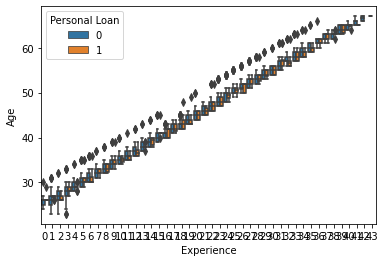

In [80]:
#correlation between age and experience
sns.boxplot(x='Experience',y='Age',hue='Personal Loan',data=bank_df)

In [134]:
income=bank_df['Income']
ccavg=bank_df['CCAvg']
correlation=income.corr(ccavg)
correlation

0.6459836696249656

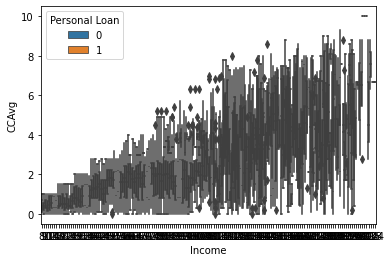

In [133]:
#correlation between income and ccavg
sns.boxplot(x='Income',y='CCAvg',hue='Personal Loan',data=bank_df)

In [35]:
bank_df.groupby(['Personal Loan']).agg(['mean','median'])

ID                Age        Experience         \
                      mean  median       mean median       mean median   
Personal Loan                                                            
0              2512.165487  2518.5  45.367257     45  20.165487     20   
1              2390.650000  2342.0  45.066667     45  19.843750     20   

                   Income             ZIP Code         ...    Mortgage         \
                     mean median          mean median  ...        mean median   
Personal Loan                                          ...                      
0               66.237389   59.0  93152.428761  93437  ...   51.789381      0   
1              144.745833  142.5  93153.202083  93407  ...  100.845833      0   

              Securities Account        CD Account           Online         \
                            mean median       mean median      mean median   
Personal Loan                                                                
0                       0.102212      0   0.035841      0  0.595796      1   
1                       0.125000      0   0.291667      0  0.606250      1   

              CreditCard         
                    mean median  
Personal Loan                    
0               0.293584      0  
1               0.297917      0  

[2 rows x 26 columns]

In [36]:
bank_df.groupby(['Personal Loan']).agg(['min','max'])

ID       Age     Experience     Income      ZIP Code         \
              min   max min max        min max    min  max      min    max   
Personal Loan                                                                
0               1  5000  23  67          0  43      8  224     9307  96651   
1              10  4981  26  65          0  41     60  203    90016  96008   

               ... Mortgage      Securities Account     CD Account     Online  \
               ...      min  max                min max        min max    min   
Personal Loan  ...                                                              
0              ...        0  635                  0   1          0   1      0   
1              ...        0  617                  0   1          0   1      0   

                  CreditCard      
              max        min max  
Personal Loan                     
0               1          0   1  
1               1          0   1  

[2 rows x 26 columns]

# Univariate and Bivariate analysis

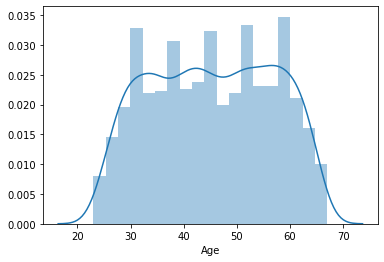

In [39]:
#taking data summarizing data finding patterns in the data
sns.distplot(bank_df.Age)

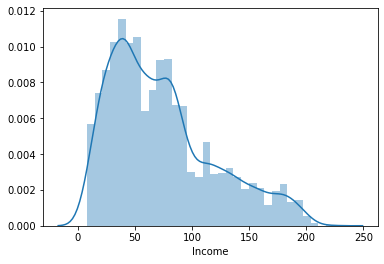

In [40]:
#right skewed distribution
sns.distplot(bank_df.Income)

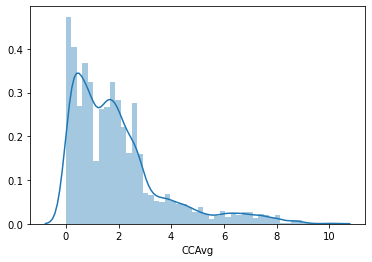

In [47]:
#right skewed distribution
sns.distplot(bank_df.CCAvg)

Mortgage          0    75    76   77    78    79   80    81   82    83   ...  \
Personal Loan                                                            ...   
0              3150.0  7.0  11.0  4.0  15.0  11.0  7.0  12.0  9.0  16.0  ...   
1               312.0  1.0   1.0  NaN   NaN   NaN  NaN   1.0  1.0   NaN  ...   

Mortgage       577  581  582  587  589  590  601  612  617  635  
Personal Loan                                                    
0              NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN  1.0  
1              1.0  1.0  1.0  1.0  1.0  1.0  NaN  1.0  1.0  NaN  

[2 rows x 347 columns]


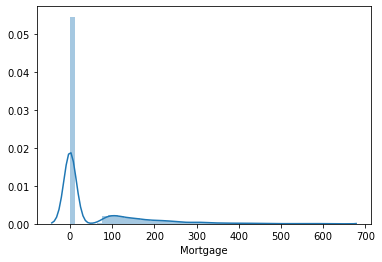

In [43]:
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Mortgage',aggfunc='size'))
sns.distplot(bank_df.Mortgage)

Family            1     2    3     4
Personal Loan                       
0              1365  1190  877  1088
1               107   106  133   134


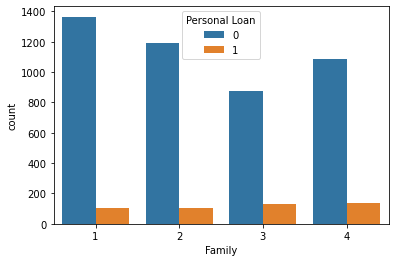

In [48]:
#Family
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Family',aggfunc='size'))
sns.countplot(x='Family',data=bank_df,hue='Personal Loan')

Observation: Family size does not have a huge influence in personal loan. But it seems families with size of 3 and 4 are more likely to take loan.

Education         1     2     3
Personal Loan                  
0              2003  1221  1296
1                93   182   205


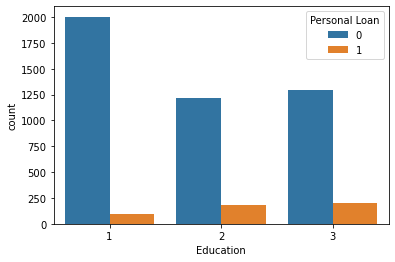

In [49]:
#Education
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Education',aggfunc='size'))
sns.countplot(x='Education',data=bank_df,hue='Personal Loan')

Observation:Majority of people who does not have a personal loan have education.

Securities Account     0    1
Personal Loan                
0                   4058  462
1                    420   60


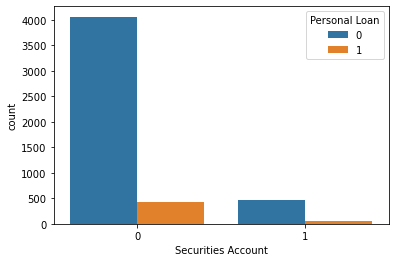

In [50]:
#Securities Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Securities Account',aggfunc='size'))
sns.countplot(x='Securities Account',data=bank_df,hue='Personal Loan')

Observation : Majority of people who does not have loan have securities account.

CD Account        0    1
Personal Loan           
0              4358  162
1               340  140


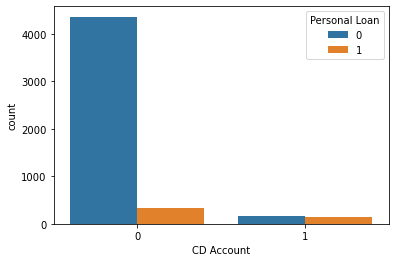

In [51]:
#CD Account
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CD Account',aggfunc='size'))
sns.countplot(x='CD Account',data=bank_df,hue='Personal Loan')

Online            0     1
Personal Loan            
0              1827  2693
1               189   291


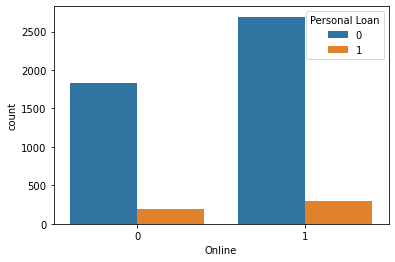

In [52]:
#Online
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='Online',aggfunc='size'))
sns.countplot(x='Online',data=bank_df,hue='Personal Loan')

CreditCard        0     1
Personal Loan            
0              3193  1327
1               337   143


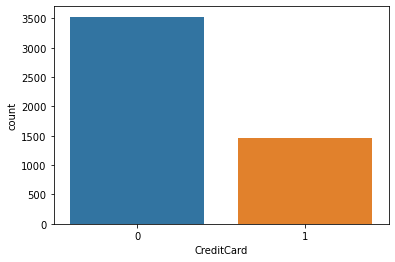

In [53]:
#CreditCard
print(pd.pivot_table(data=bank_df,index='Personal Loan',columns='CreditCard',aggfunc='size'))
sns.countplot(x='CreditCard',data=bank_df)

# multivariate analysis

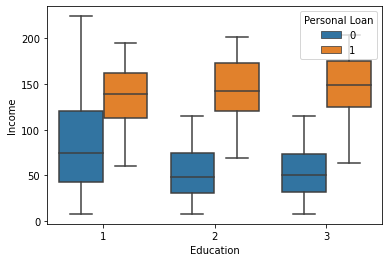

In [54]:
#influence of income and education on personal loan
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=bank_df)

Observation : It seems customers whose education level 1 is having more income

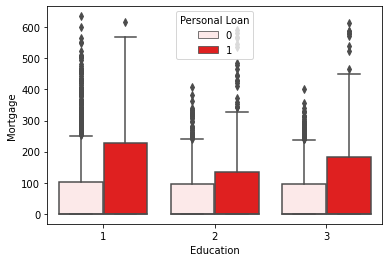

In [56]:
sns.boxplot(x='Education',y='Mortgage',hue='Personal Loan',data=bank_df,color='red')

Observation : High mortgage level.

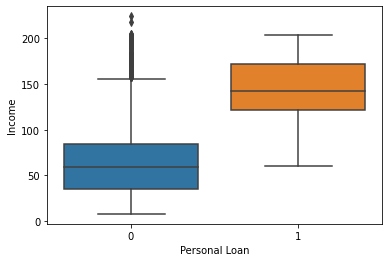

In [57]:
sns.boxplot(x='Personal Loan',y='Income',data=bank_df)

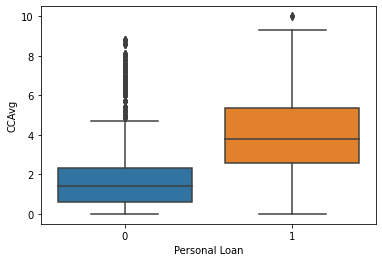

In [58]:
sns.boxplot(x='Personal Loan',y='CCAvg',data=bank_df)

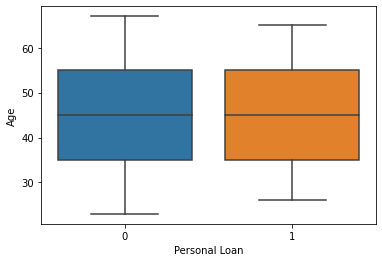

In [59]:
sns.boxplot(x='Personal Loan',y='Age',data=bank_df)

In [60]:
bank_df=bank_df.drop(['ID'],axis=1)

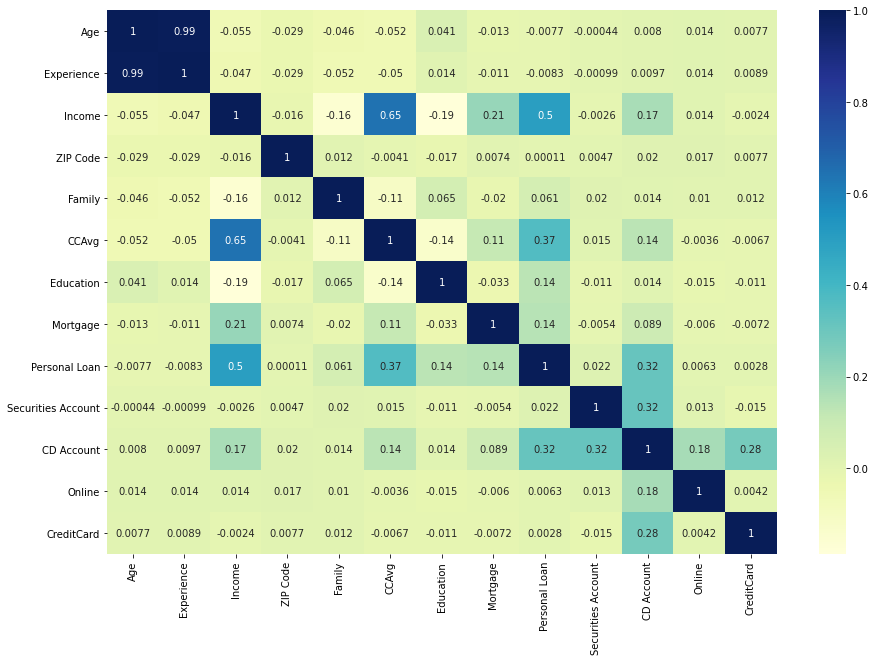

In [61]:
#based on these analysis we are printing a correlation heat map
bank_corr=bank_df.corr()
plt.subplots(figsize =(15, 10)) 
sns.heatmap(bank_corr,cmap="YlGnBu",annot=True)

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

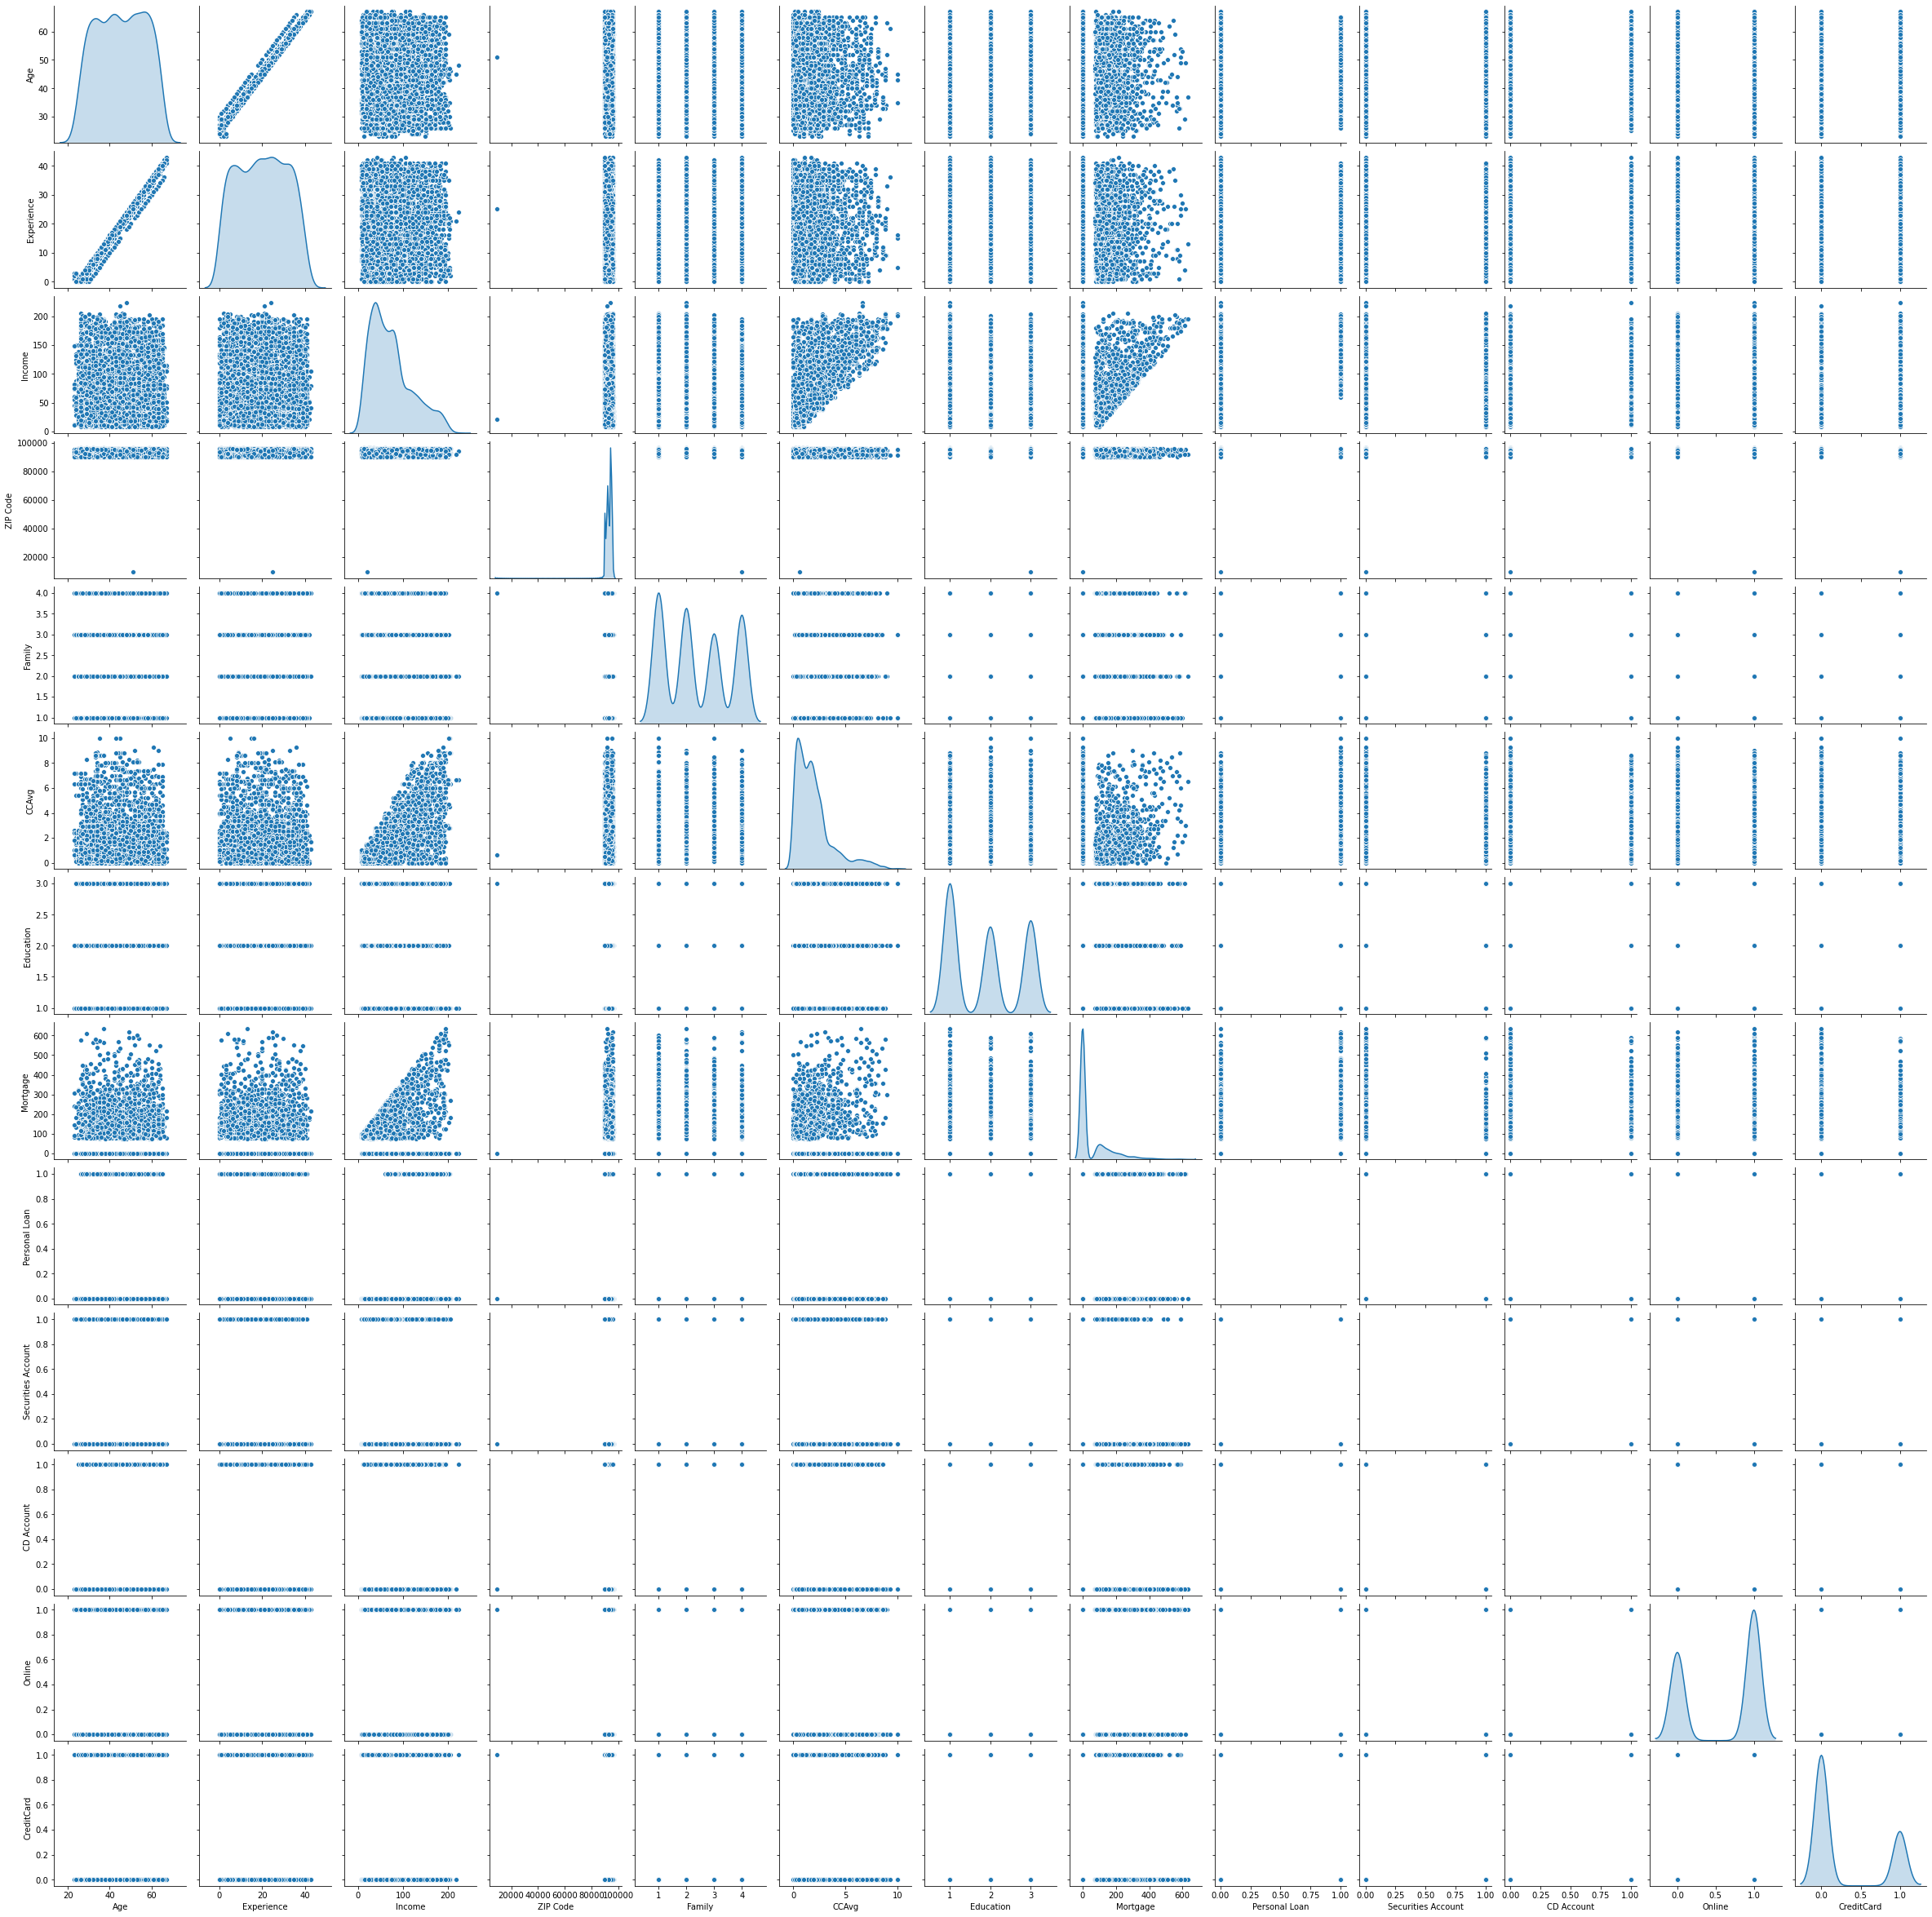

In [72]:
#plt.figure(figsize = (20,20))
sns.pairplot(bank_df,diag_kind='kde')

Observation:
Age is normally distributed
Income is positively skewed
CCAvg is also positively skewed & average spending is 2.5k
Family and Education are ordinaly distributed variables.

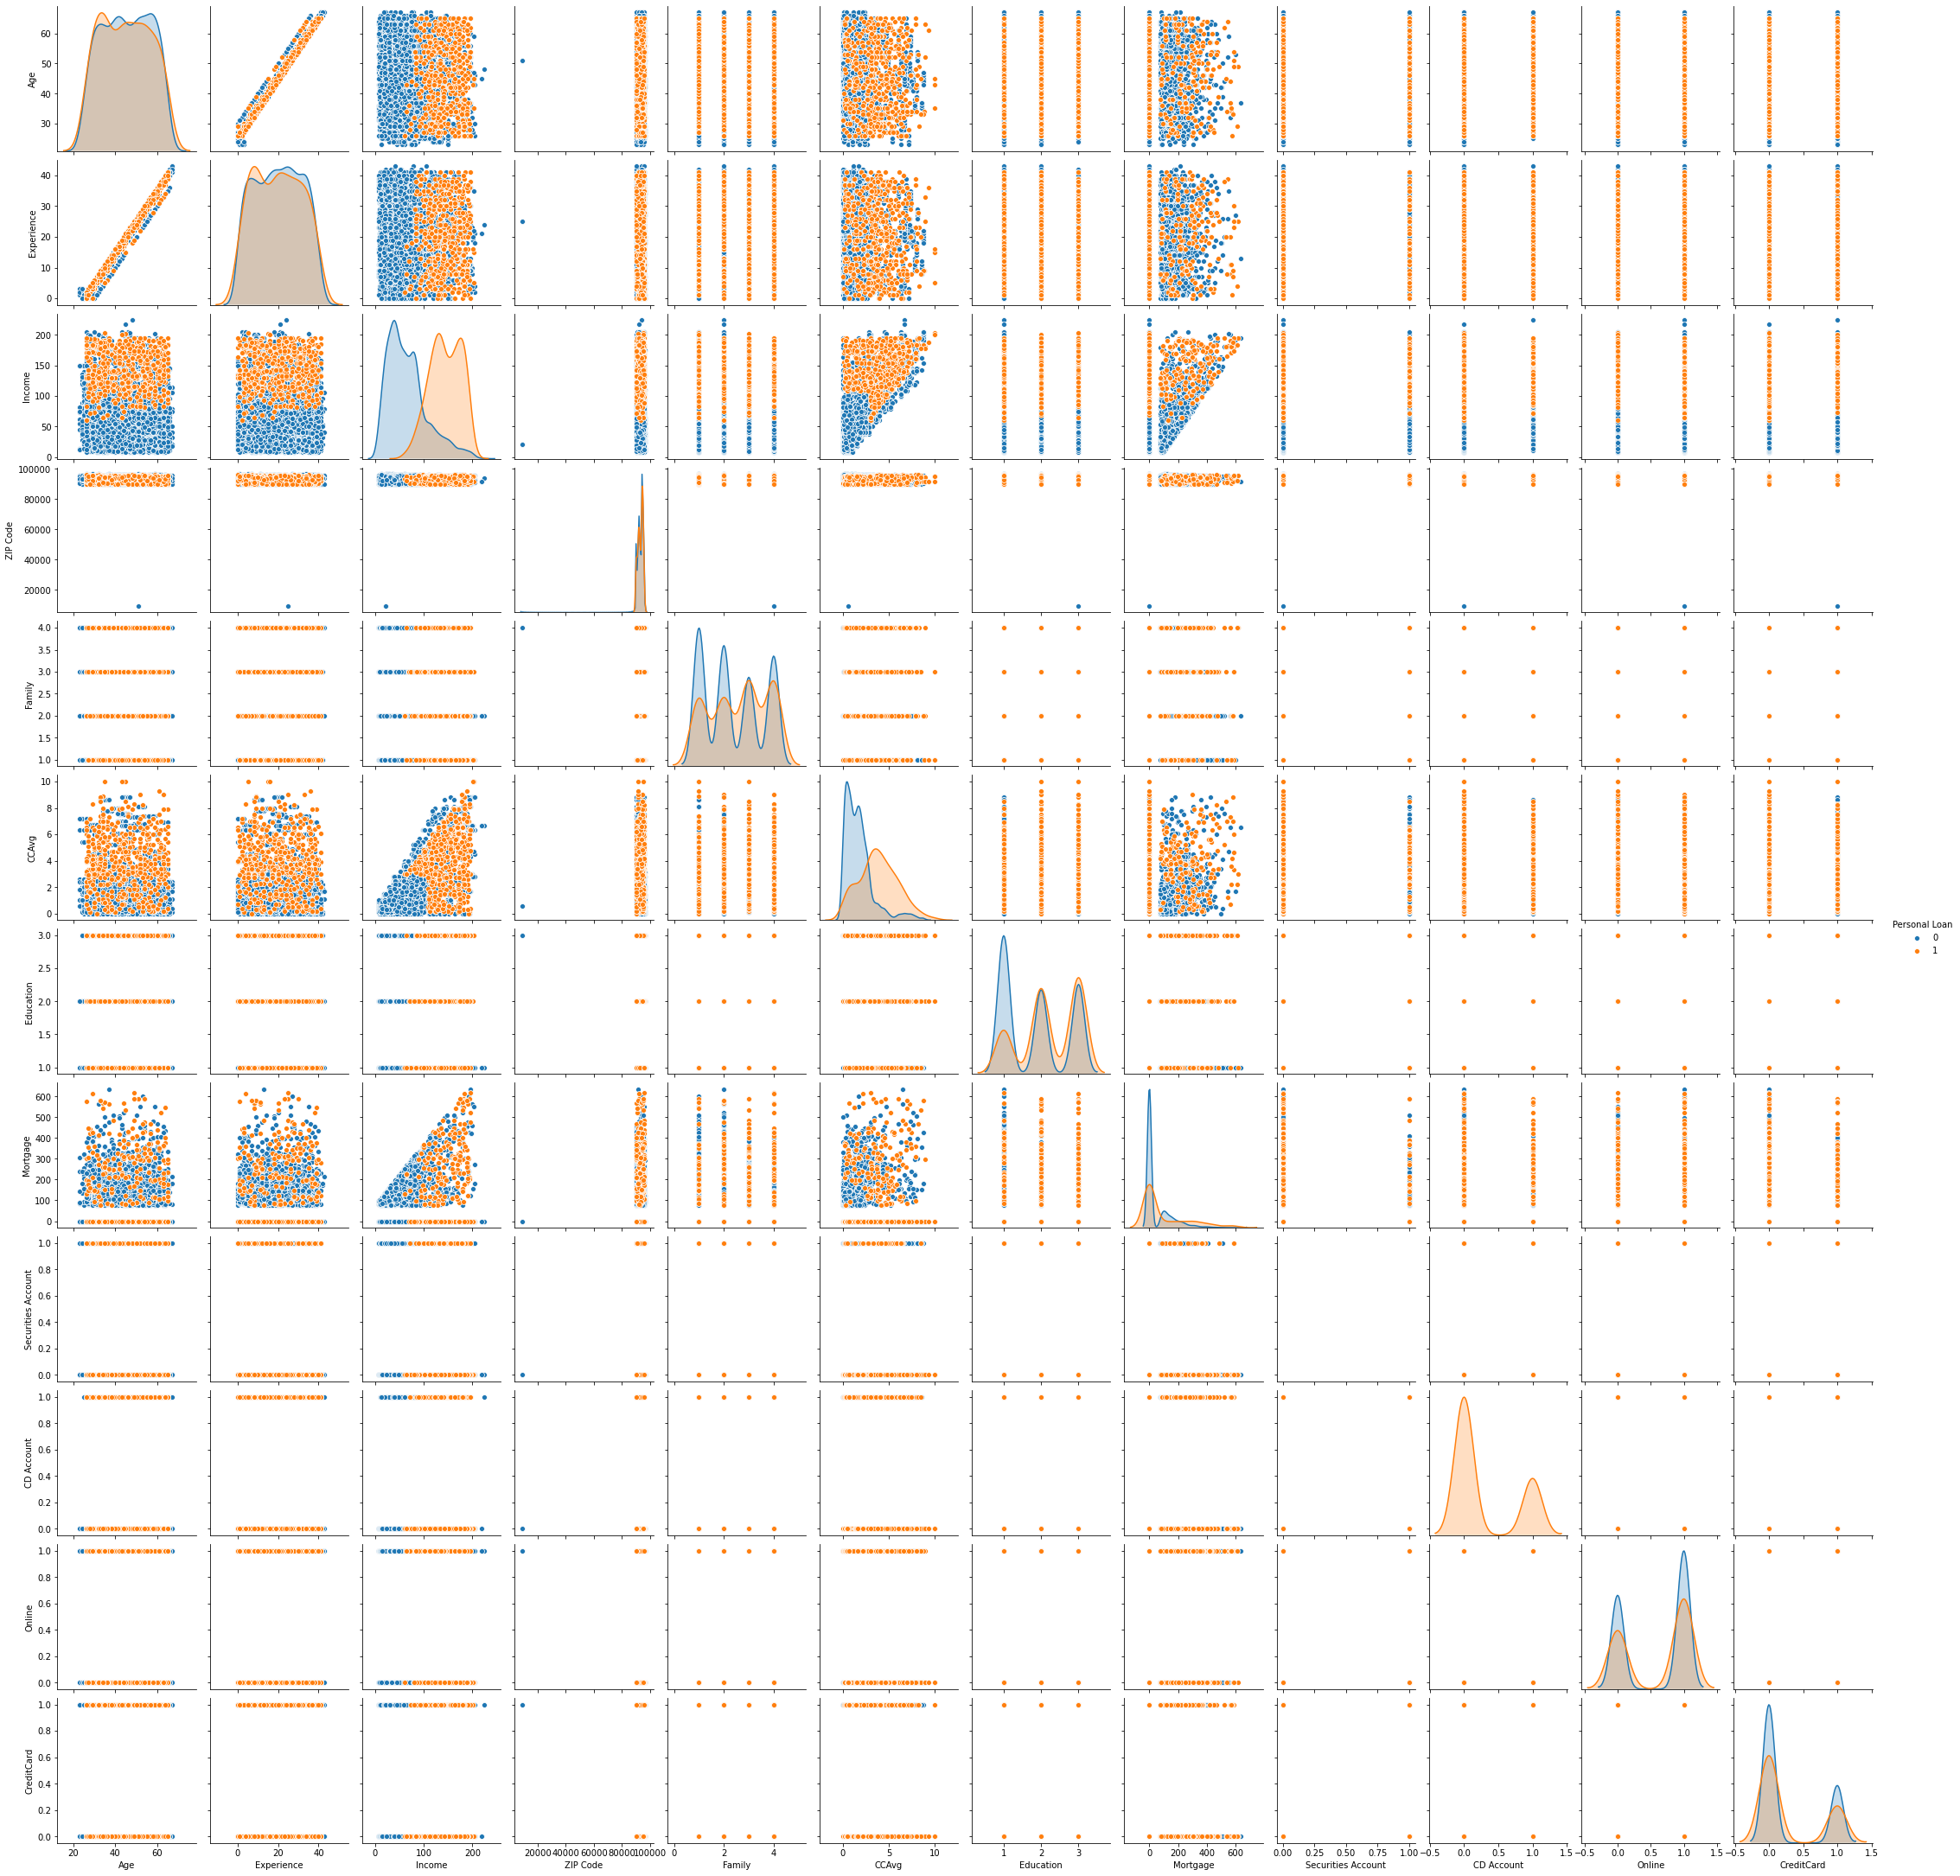

In [78]:
sns.pairplot(bank_df,diag_kind='kde',hue='Personal Loan')

In [81]:
#Creating family dummy Variables
fa = pd.get_dummies(bank_df['Family'], prefix='Family')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df,fa], axis=1)

In [82]:
#Creating education dummy Variables
ed = pd.get_dummies(bank_df['Education'], prefix='Education')
#Adding the results to the master dataframe
bank_df1 = pd.concat([bank_df1,ed], axis=1)

In [83]:
# We have created dummies for the below variables, so we can drop them
##bank_df2 is our new dataset after cleaning and transformation
bank_df2=bank_df1.drop(['Education','Family'],1)

In [84]:
var=['Securities Account','CD Account','Online','CreditCard']
bank_df2[var]=bank_df2[var].astype('int64')

In [85]:
bank_df2_X = bank_df2.drop(['Personal Loan'], axis=1)
X = bank_df2.drop(['Personal Loan'], axis=1)
y = bank_df2['Personal Loan']


In [86]:
X.dtypes

Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
CCAvg                 float64
Mortgage                int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
Family_1                uint8
Family_2                uint8
Family_3                uint8
Family_4                uint8
Education_1             uint8
Education_2             uint8
Education_3             uint8
dtype: object

# splitting data 


In [87]:
#Test Train Split in 70:30
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_df2_X, y, train_size=0.7, test_size=0.3, random_state=100)

In [88]:
#Feature Scaling library
from sklearn.preprocessing import StandardScaler

In [89]:
#Applying Scaling to training set
scaler = StandardScaler()
X_train[['Age','Experience','Income','CCAvg']] = scaler.fit_transform(X_train[['Age','Experience','Income','CCAvg']])
X_test[['Age','Experience','Income','CCAvg']] = scaler.transform(X_test[['Age','Experience','Income','CCAvg']])

# Model Implementation

In [94]:
#ITERATION 1 - Fitting all the features in the first iteration
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result1=logit_model.fit()
print(result1.summary2())

Optimization terminated successfully.
         Current function value: 0.106272
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.654      
Dependent Variable:  Personal Loan    AIC:              775.9029   
Date:                2020-09-04 15:05 BIC:              874.4712   
No. Observations:    3500             Log-Likelihood:   -371.95    
Df Model:            15               LL-Null:          -1075.0    
Df Residuals:        3484             LLR p-value:      8.1329e-291
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.   Std.Err.    z    P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                 -0.0555   0.9058 -0.0613 0.9512 -1.8309  1.7199
Experience           0.2542   0.9010  0.

In [92]:
#dropping Family_2 and Education_1 in iteration 2 as they have high p value
X_train1 = X_train.drop(['Family_2','Education_1'], axis=1)

In [95]:
#ITERATION 2
logit_model=sm.Logit(y_train,X_train1)
result2=logit_model.fit()
print(result2.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              786.0626   
Date:                2020-09-04 15:05 BIC:              878.4704   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            14               LL-Null:          -1075.0    
Df Residuals:        3485             LLR p-value:      3.3044e-289
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Age                -0.0389   0.8931  -0.0436 0.9652 -1.7894  1.7115
Experience          0.2218   0.8877   0.

In [96]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [97]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


,Features,VIF
0,Age,86.35
1,Experience,86.22
3,ZIP Code,7.86
8,Online,2.61
10,Family_1,2.12
12,Family_4,2.05
14,Education_3,1.90
2,Income,1.88
11,Family_3,1.88
13,Education_2,1.79


In [98]:
#dropping Age as it high VIF value and its very strongly correlated to experience in correlation matrix
X_train1 = X_train.drop(['Family_2','Education_1','Age'],axis=1)

In [99]:
#ITERATION 3
logit_model=sm.Logit(y_train,X_train1)
result3=logit_model.fit()
print(result3.summary2())

Optimization terminated successfully.
         Current function value: 0.108009
         Iterations 10
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.648      
Dependent Variable:  Personal Loan    AIC:              784.0646   
Date:                2020-09-04 15:06 BIC:              870.3118   
No. Observations:    3500             Log-Likelihood:   -378.03    
Df Model:            13               LL-Null:          -1075.0    
Df Residuals:        3486             LLR p-value:      3.1311e-290
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      10.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1834   0.0966   1.8989 0.0576 -0.0059  0.3726
Income              3.0115   0.1795  16.

In [100]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.75
7,Online,2.61
9,Family_1,2.12
11,Family_4,2.05
1,Income,1.87
10,Family_3,1.87
13,Education_3,1.78
12,Education_2,1.77
3,CCAvg,1.75
8,CreditCard,1.58


In [101]:
#dropping Mortgage as it high p value
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage'],axis=1)

In [102]:
#ITERATION 4
logit_model=sm.Logit(y_train,X_train1)
result4=logit_model.fit()
print(result4.summary2())

Optimization terminated successfully.
         Current function value: 0.108273
         Iterations 9
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.647      
Dependent Variable:  Personal Loan    AIC:              783.9101   
Date:                2020-09-04 15:07 BIC:              863.9969   
No. Observations:    3500             Log-Likelihood:   -378.96    
Df Model:            12               LL-Null:          -1075.0    
Df Residuals:        3487             LLR p-value:      7.1073e-291
Converged:           1.0000           Scale:            1.0000     
No. Iterations:      9.0000                                        
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1793   0.0964   1.8593 0.0630 -0.0097  0.3682
Income              3.0247   0.1792  16.8

In [103]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,ZIP Code,7.39
6,Online,2.61
8,Family_1,2.12
10,Family_4,2.05
9,Family_3,1.87
1,Income,1.83
12,Education_3,1.78
11,Education_2,1.77
3,CCAvg,1.74
7,CreditCard,1.58


In [104]:
#dropping ZIP code as it has high VIF
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code'],axis=1)
#                         'CCAvg',], axis=1)

#ITERATION 5
logit_model=sm.Logit(y_train,X_train1)
result5=logit_model.fit()
print(result5.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239325
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1699.2744 
Date:                 2020-09-04 15:07 BIC:              1773.2007 
No. Observations:     3500             Log-Likelihood:   -837.64   
Df Model:             11               LL-Null:          -1075.0   
Df Residuals:         3488             LLR p-value:      7.8786e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1087   0.0634   1.7159 0.0862 -0.0155  0.2329
Income              1.2631   0.0811  15.5

,Features,VIF
5,Online,2.04
1,Income,1.81
2,CCAvg,1.74
9,Family_4,1.59
10,Education_2,1.59
7,Family_1,1.54
11,Education_3,1.54
8,Family_3,1.46
6,CreditCard,1.43
4,CD Account,1.36


In [105]:
#dropping CCAvg as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg'],axis=1)

#ITERATION 6
logit_model=sm.Logit(y_train,X_train1)
result6=logit_model.fit()
print(result6.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239336
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.221     
Dependent Variable:   Personal Loan    AIC:              1697.3486 
Date:                 2020-09-04 15:08 BIC:              1765.1143 
No. Observations:     3500             Log-Likelihood:   -837.67   
Df Model:             10               LL-Null:          -1075.0   
Df Residuals:         3489             LLR p-value:      1.1543e-95
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1081   0.0633   1.7071 0.0878 -0.0160  0.2321
Income              1.2754   0.0673  18.9

,Features,VIF
4,Online,2.04
8,Family_4,1.59
9,Education_2,1.59
6,Family_1,1.54
10,Education_3,1.54
7,Family_3,1.46
5,CreditCard,1.43
3,CD Account,1.36
2,Securities Account,1.24
1,Income,1.09


In [106]:
#dropping Education_2  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        ],
                        axis=1)

#ITERATION 7
logit_model=sm.Logit(y_train,X_train1)
result7=logit_model.fit()
print(result7.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239486
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.220     
Dependent Variable:   Personal Loan    AIC:              1696.4051 
Date:                 2020-09-04 15:08 BIC:              1758.0103 
No. Observations:     3500             Log-Likelihood:   -838.20   
Df Model:             9                LL-Null:          -1075.0   
Df Residuals:         3490             LLR p-value:      2.5961e-96
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6886 0.0913 -0.0172  0.2309
Income              1.2680   0.0668  18.9

,Features,VIF
4,Online,1.97
6,Family_1,1.45
8,Family_4,1.44
5,CreditCard,1.42
3,CD Account,1.36
9,Education_3,1.34
7,Family_3,1.31
2,Securities Account,1.23
1,Income,1.07
0,Experience,1.01


In [107]:
#dropping Education_3  as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3'],axis=1)

#ITERATION 8
logit_model=sm.Logit(y_train,X_train1)
result8=logit_model.fit()
print(result8.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.239772
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.219     
Dependent Variable:   Personal Loan    AIC:              1696.4016 
Date:                 2020-09-04 15:08 BIC:              1751.8463 
No. Observations:     3500             Log-Likelihood:   -839.20   
Df Model:             8                LL-Null:          -1075.0   
Df Residuals:         3491             LLR p-value:      8.7449e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Experience          0.1068   0.0633   1.6879 0.0914 -0.0172  0.2308
Income              1.2587   0.0663  18.9

,Features,VIF
4,Online,1.94
5,CreditCard,1.42
8,Family_4,1.39
6,Family_1,1.38
3,CD Account,1.36
7,Family_3,1.28
2,Securities Account,1.23
1,Income,1.07
0,Experience,1.01


In [108]:
#dropping Experience as it has high value of p
X_train1 = X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)

#ITERATION 9
logit_model=sm.Logit(y_train,X_train1)
result9=logit_model.fit()
print(result9.summary2())

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
col = X_train1.columns
vif = pd.DataFrame()
vif['Features'] = X_train1[col].columns
vif['VIF'] = [variance_inflation_factor(X_train1[col].values, i) for i in range(X_train1[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Optimization terminated successfully.
         Current function value: 0.240180
         Iterations 8
                          Results: Logit
Model:                Logit            Pseudo R-squared: 0.218     
Dependent Variable:   Personal Loan    AIC:              1697.2579 
Date:                 2020-09-04 15:13 BIC:              1746.5421 
No. Observations:     3500             Log-Likelihood:   -840.63   
Df Model:             7                LL-Null:          -1075.0   
Df Residuals:         3492             LLR p-value:      4.2152e-97
Converged:            1.0000           Scale:            1.0000    
No. Iterations:       8.0000                                       
-------------------------------------------------------------------
                    Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-------------------------------------------------------------------
Income              1.2499   0.0659  18.9748 0.0000  1.1208  1.3790
Securities Account -1.7785   0.2647  -6.7

,Features,VIF
3,Online,1.94
4,CreditCard,1.42
7,Family_4,1.39
5,Family_1,1.38
2,CD Account,1.36
6,Family_3,1.28
1,Securities Account,1.23
0,Income,1.06


In [109]:
##Now all the features are significant and VIF is also fine. Selecting these variables to predict the result

# Logistic Regression Model Fitting

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

logreg = LogisticRegression()
logreg.fit(X_train1, y_train)

LogisticRegression()

In [112]:
#Fitting the model on test data
X_test1 = X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],
                        axis=1)
X_test1.columns

Index(['Income', 'Securities Account', 'CD Account', 'Online', 'CreditCard',
       'Family_1', 'Family_3', 'Family_4'],
      dtype='object')

In [113]:

y_pred = logreg.predict(X_test1)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test1, y_test)))

Accuracy of logistic regression classifier on test set: 0.93


In [114]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[1317   25]
 [  81   77]]


In [115]:
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=77
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1317
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=25
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=81

Accuracy of logistic regression classifier on test set: 92.93%
Misclassification Rate: It is often wrong: 7.07%
Sensitivity: When its actually yes how often it predicts yes: 48.73%
Specificity: When its actually no, how often does it predict no: 98.14%
Precision: When it predicts yes, how often is it correct: 75.49%


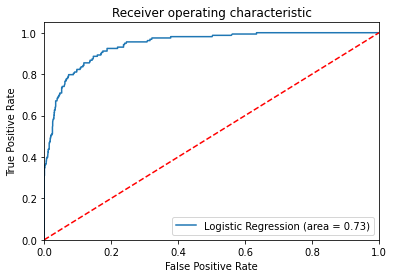

In [116]:
Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

In [117]:
#Sensitivity value is too low, this may be due to data we have. Which contains only 480 records which are 
#yes it seems model needs more data to train itself.

#Specificity seems fine

#Trying new model K nearest neighbour to check if we could improve the results.

#More the area under ROC better the model performs, its 0.73 in this case. Model is ok be lets see if this could be 
#improved further specially Sesitivity

In [118]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.94      0.98      0.96      1342
           1       0.75      0.49      0.59       158

    accuracy                           0.93      1500
   macro avg       0.85      0.73      0.78      1500
weighted avg       0.92      0.93      0.92      1500



In [119]:
y_pred_1 = pd.DataFrame(y_pred)
y_pred_1.head()

,0
0,0
1,0
2,0
3,0
4,0


# Applying KNN for classification

In [120]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
#Using X_train dataframe as it was final data after cleaning, apply scaling and splitting

In [122]:
# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH.fit(X_train, y_train)

KNeighborsClassifier()

In [123]:
# For every test data point, predict it's label based on 5 nearest neighbours in this model. The majority class will 
# be assigned to the test data point
predicted_labels_KNN = NNH.predict(X_test)

In [124]:
NNH.score(X_test, y_test)

0.894

In [125]:
print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1328   14]
 [ 145   13]]


In [126]:
#Iteration 1:Using same features as derived in above Logistic model, we perofrmance getting improved
X_KNN_train1 = X_train.drop(['Age'],axis=1)
#                         'ZIP Code','CCAvg','Family_2','Education_1','Age','Mortgage'], axis=1)

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH1 = KNeighborsClassifier(n_neighbors= 5 , weights = 'uniform' )
NNH1.fit(X_train1, y_train)

X_KNN_test1 = X_test.drop(['Age'],axis=1)
predicted_labels_KNN = NNH1.predict(X_test1)

NNH1.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1324   18]
 [  68   90]]


Accuracy of logistic regression classifier on test set: 94.27%
Misclassification Rate: It is often wrong: 5.73%
Sensitivity: When its actually yes how often it predicts yes: 56.96%
Specificity: When its actually no, how often does it predict no: 98.66%
Precision: When it predicts yes, how often is it correct: 83.33%


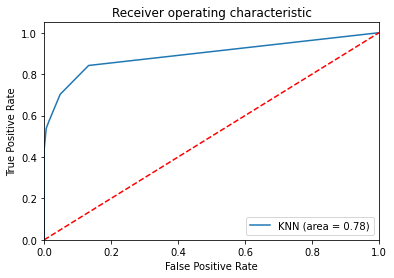

In [127]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=90
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1324
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=18
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=68

Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH1.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH1.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [128]:
#Iteration 2:Using same features as derived in above Logistic model, however taking neighbours as 9

# Call Nearest Neighbour algorithm, keeping number of neighbours as 5
NNH2 = KNeighborsClassifier(n_neighbors= 9, weights = 'uniform' )
NNH2.fit(X_train1, y_train)

predicted_labels_KNN = NNH2.predict(X_test1)

NNH2.score(X_test1, y_test)

print(metrics.confusion_matrix(y_test, predicted_labels_KNN))

[[1330   12]
 [  66   92]]


Accuracy of logistic regression classifier on test set: 94.80%
Misclassification Rate: It is often wrong: 5.20%
Sensitivity: When its actually yes how often it predicts yes: 58.23%
Specificity: When its actually no, how often does it predict no: 99.11%
Precision: When it predicts yes, how often is it correct: 88.46%


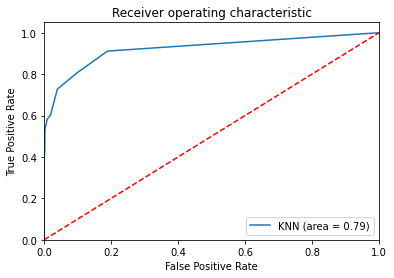

In [129]:
#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=92
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1330
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=12
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=66


Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
KNN_roc_auc = roc_auc_score(y_test, NNH2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, NNH2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
#Model has improved with KNN and n_neighbours as 9, also ROC and AUC have improved

# Applying Gaussian Naive Bayes

In [130]:
from sklearn.naive_bayes import GaussianNB


[[1253   89]
 [  56  102]]
Accuracy of logistic regression classifier on test set: 90.33%
Misclassification Rate: It is often wrong: 9.67%
Sensitivity: When its actually yes how often it predicts yes: 64.56%
Specificity: When its actually no, how often does it predict no: 93.37%
Precision: When it predicts yes, how often is it correct: 53.40%


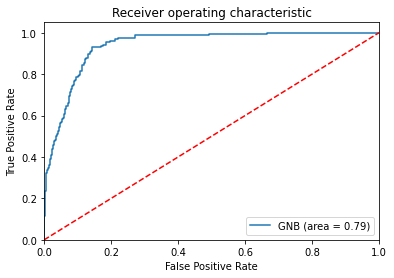

In [131]:
#Iteration 1 - Fitting all variables, cleaned and normalized data
GNB1 = GaussianNB()
GNB1.fit(X_train, y_train)
predicted_labels_GNB = GNB1.predict(X_test)

GNB1.score(X_test, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=102
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1253
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=89
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=56


Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB1.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, GNB1.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

[[1270   72]
 [  86   72]]
Accuracy of logistic regression classifier on test set: 89.47%
Misclassification Rate: It is often wrong: 10.53%
Sensitivity: When its actually yes how often it predicts yes: 45.57%
Specificity: When its actually no, how often does it predict no: 94.63%
Precision: When it predicts yes, how often is it correct: 50.00%


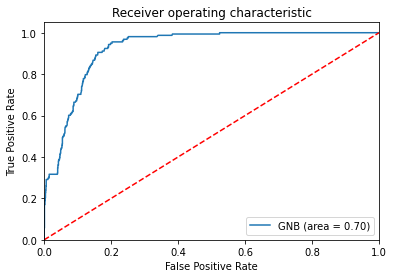

In [132]:
#Iteration 2 - Dropping all variables as found in Logistic Regression
X_train1=X_train.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],1)
X_test1= X_test.drop(['Family_2','Education_1','Age','Mortgage','ZIP Code','CCAvg','Education_2',
                        'Education_3','Experience'],axis=1)

GNB2 = GaussianNB()
GNB2.fit(X_train1, y_train)
predicted_labels_GNB = GNB2.predict(X_test1)

GNB2.score(X_test1, y_test)
print(metrics.confusion_matrix(y_test, predicted_labels_GNB))

#CALCULATING METRICES FOR CHECING MODEL
#true positives (TP): These are cases in which we predicted yes, and actually took loan.
TP=72
#true negatives (TN): We predicted no, and they actually did not took loan.
TN=1270
#false positives (FP): We predicted yes, but they don't actually took loan.(Also known as a "Type I error.")
FP=72
#false negatives (FN): We predicted no, but they actually took loan.(Also known as a "Type II error.")
FN=86


Accuracy=(TP+TN)/(TP+TN+FP+FN)
print('Accuracy of logistic regression classifier on test set: {:.2%}'.format(Accuracy))

Misclassification_Rate=(FP+FN)/(TP+TN+FP+FN)
print('Misclassification Rate: It is often wrong: {:.2%}'.format(Misclassification_Rate))

#Recall
Sensitivity=TP/(FN+TP)
print('Sensitivity: When its actually yes how often it predicts yes: {:.2%}'.format(Sensitivity))

Specificity=TN/(TN+FP)
print('Specificity: When its actually no, how often does it predict no: {:.2%}'.format(Specificity))

Precision=TP/(FP+TP)
print('Precision: When it predicts yes, how often is it correct: {:.2%}'.format(Precision))

#ROC Curve
GNB_roc_auc = roc_auc_score(y_test, GNB2.predict(X_test1))
fpr, tpr, thresholds = roc_curve(y_test, GNB2.predict_proba(X_test1)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='GNB (area = %0.2f)' % GNB_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
#plt.savefig('Log_ROC')
plt.show()

In [ ]:
Chossing the best of all 3 models and below are there results:

#Model	  Results									                                      Matrix
#Logistic Accuracy of logistic regression classifier on test set:            92.93%		 [[1317   25]
#	      Misclassification Rate:It is often wrong:                           7.07%		  [  81   77]]
#	      Sensitivity: When its actually yes how often it predicts yes:      48.73%
#	      Specificity: When its actually no, how often does it predict no:   98.14%
#	      Precision: When it predicts yes, how often is it correct:          75.49%
#	

#KNN	  Accuracy of logistic regression classifier on test set:            94.80%		 [[1330   12]
#	      Misclassification Rate: It is often wrong:                          5.20%		  [  66   92]]
#	      Sensitivity: When its actually yes how often it predicts yes:      58.23%
#	      Specificity: When its actually no, how often does it predict no:   99.11%
#	      Precision: When it predicts yes, how often is it correct:          88.46%
#	
#GNB	  Accuracy of logistic regression classifier on test set:            90.33%		 [[1253   89]
#	      Misclassification Rate: It is often wrong:                          9.67%		  [  56  102]]
#	      Sensitivity: When its actually yes how often it predicts yes:      64.56%
#	      Specificity: When its actually no, how often does it predict no:   93.37%
#	      Precision: When it predicts yes, how often is it correct:          53.40%

In [ ]:

#KNN model performs the best, evident from above results. However, Sensitivity is greater in GNB.
#The yes prediction is on lower side as data is not balanced. Data was not altered as figure represented the 
#true picture of market i.e. person who took loan are on lower side.
#If we apply the model and change our approach and target only those predicted as yes first, it is 88% (Precision)
#chance they will take loan. Hence our chances that a person takes personal loan increases.
#Though our Sensitivity is around 58% still we end up offering more loans at end of program